In [1]:
import disentangler as dt
from disentangler.dependencies import *
import scvi

atac_data = dt.bonemarrow.utils.load_ATAC_data()

INFO:pytorch_lightning.utilities.seed:Global seed set to 0


In [2]:
mira_model = mira.topics.load_model(dt.bonemarrow.config.MIRA_ATAC)
mira_no_correction = mira.topics.load_model(dt.bonemarrow.config.MIRA_ATAC_NO_CORRECTION)
peakvi = scvi.model.PEAKVI.load(dt.bonemarrow.config.PEAKVI, adata = atac_data)

/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu
INFO:mira.topic_model.base:Moving model to CPU for inferen

INFO     File data/bonemarrow/models/peakvi.pth/model.pt already downloaded                  


INFO:absl:Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO:absl:Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
INFO:absl:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


In [3]:
mira_nofrip = mira.topics.load_model(dt.bonemarrow.config.MIRA_ATAC_NOFRIP)

/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


In [5]:
mira_no_correction.predict(atac_data, add_key='X_no_correction_topics', add_cols=False)

mira_no_correction.get_umap_features(atac_data, box_cox=0.1, 
                                     key = 'X_no_correction_topics',
                                    add_key = 'MIRA_no_correction_umap_features')

mira_no_correction.get_umap_features(atac_data, box_cox=0.5, 
                                     key = 'X_no_correction_topics',
                                    add_key = 'X_no_correction_umap_features')

Predicting latent vars:   0%|          | 0/263 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_no_correction_topics
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations
INFO:mira.adata_interface.topic_model:Fetching key X_no_correction_topics from obsm
INFO:mira.adata_interface.core:Added key to obsm: MIRA_no_correction_umap_features
INFO:mira.adata_interface.topic_model:Fetching key X_no_correction_topics from obsm
INFO:mira.adata_interface.core:Added key to obsm: X_no_correction_umap_features


In [6]:
mira_nofrip.predict(atac_data, add_key='X_nofrip_topics', add_cols=False)

mira_nofrip.get_umap_features(atac_data, box_cox=0.1, 
                                     key = 'X_nofrip_topics',
                                    add_key = 'MIRA_nofrip_umap_features')

mira_nofrip.get_umap_features(atac_data, box_cox=0.5, 
                                     key = 'X_nofrip_topics',
                                    add_key = 'X_nofrip_umap_features')

Predicting latent vars:   0%|          | 0/263 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_nofrip_topics
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations
INFO:mira.adata_interface.topic_model:Fetching key X_nofrip_topics from obsm
INFO:mira.adata_interface.core:Added key to obsm: MIRA_nofrip_umap_features
INFO:mira.adata_interface.topic_model:Fetching key X_nofrip_topics from obsm
INFO:mira.adata_interface.core:Added key to obsm: X_nofrip_umap_features


In [7]:
mira_model.predict(atac_data)
mira_model.get_umap_features(atac_data, box_cox=0.1)

Predicting latent vars:   0%|          | 0/263 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9, topic_10, topic_11, topic_12, topic_13, topic_14, topic_15, topic_16, topic_17, topic_18, topic_19, topic_20, topic_21, topic_22, topic_23, topic_24
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.core:Added key to obsm: X_umap_features


In [8]:
atac_data.obsm['MIRA_umap_features'] = atac_data.obsm['X_umap_features'].copy()
mira_model.get_umap_features(atac_data, box_cox = 0.5)

INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.core:Added key to obsm: X_umap_features


In [9]:
atac_data.obsm['peakvi_features'] = peakvi.get_latent_representation(atac_data)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

svd_pipeline = Pipeline([
    ('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components=30)),
    ('scaler', StandardScaler()),
])

atac_data.obsm['X_LSI'] = svd_pipeline.fit_transform(atac_data.X)

In [11]:
import harmonypy as hm
ho = hm.run_harmony(atac_data.obsm['X_LSI'][:,:30], atac_data.obs, ['Site','DonorNumber'])

atac_data.obsm['X_harmony'] = ho.Z_corr.T

2022-09-27 14:57:41,542 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2022-09-27 14:58:46,760 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2022-09-27 14:59:51,241 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2022-09-27 15:00:41,767 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2022-09-27 15:01:11,356 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2022-09-27 15:01:38,212 - harmonypy - INFO - Converged after 5 iterations
INFO:harmonypy:Converged after 5 iterations


In [12]:
joint_celltype_batchcols = atac_data.obs['cell_type'].astype(str) \
    + ":" + atac_data.obs['Site'].astype(str)

In [13]:
latent_spaces = ['X_umap_features', 'X_no_correction_umap_features','X_nofrip_umap_features','peakvi_features','X_harmony','X_LSI']
umap_spaces = ['MIRA_umap_features', 'MIRA_no_correction_umap_features','MIRA_nofrip_umap_features'] + latent_spaces[2:]

In [14]:
from sklearn.metrics import silhouette_samples

In [15]:
for space in latent_spaces:
    
    batch = \
        silhouette_samples(
            atac_data.obsm[space],
            joint_celltype_batchcols,
        )
    
    
    cell = \
        silhouette_samples(
            atac_data.obsm[space],
            atac_data.obs_vector('cell_type'),
        )
    
    atac_data.obs[space + '_batch-silhouette'] = batch
    atac_data.obs[space + '_silhouette'] = cell
    
    print(space + ':', np.mean(cell), np.mean(batch))

X_umap_features: 0.16596693700597734 -0.05866639904496883
X_no_correction_umap_features: 0.1370102798551767 0.007664476163310613
X_nofrip_umap_features: 0.1551616480244706 -0.05847077309233215
peakvi_features: 0.12612902 -0.039336577
X_harmony: 0.094188385 -0.054557633
X_LSI: 0.08083569 -0.015240812


In [16]:
for space in umap_spaces:
    sc.pp.neighbors(atac_data, use_rep = space, metric = 'manhattan' if space == 'MIRA_umap_features' else 'euclidean')
    sc.tl.umap(atac_data, min_dist = 0.1, negative_sample_rate = 3)
    atac_data.obsm[space + '_UMAP'] = atac_data.obsm['X_umap'].copy()

In [17]:
!mkdir -p sup1/
!mkdir -p sup1/umaps

In [18]:
umap_spaces

['MIRA_umap_features',
 'MIRA_no_correction_umap_features',
 'MIRA_nofrip_umap_features',
 'X_nofrip_umap_features',
 'peakvi_features',
 'X_harmony',
 'X_LSI']

In [120]:
def rot(t):
    return np.array([[np.cos(t), -np.sin(t)],[np.sin(t), np.cos(t)]])

atac_data.obsm['X_LSI_rot_UMAP' ] = np.dot(atac_data.obsm['X_LSI_UMAP'], rot(-np.pi/3))

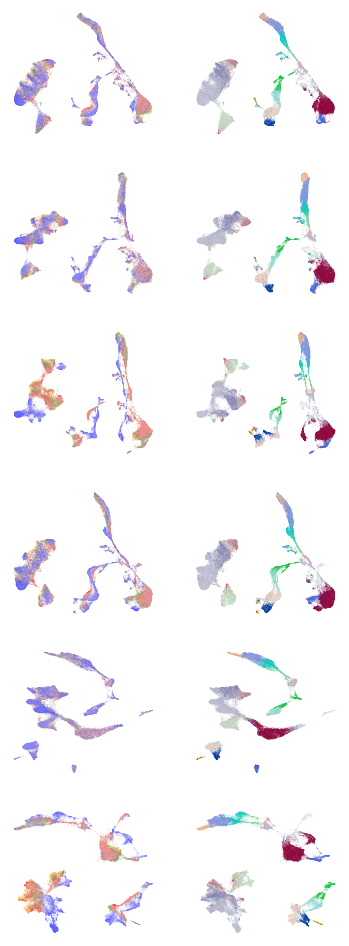

In [131]:
fig, ax = plt.subplots(6,2,figsize=(6,20/7*6))#, gridspec_kw = dict(hspace = 0.4, wspace = 0.2))

order = ['MIRA_umap_features',
 'peakvi_features',
 'MIRA_no_correction_umap_features',
 'MIRA_nofrip_umap_features',
 'X_harmony',
 'X_LSI_rot']
general_umap_kwargs = dict(
                  legend_loc='none', title = '', show = False, alpha = 1., frameon=False, s = 0.75)

celltype_umap_kwargs = dict(color = 'cell_type', palette= dt.bonemarrow.colors.CELL_PALETTE, **general_umap_kwargs)

batch_umap_kwargs = dict(color = 'batch', palette= dt.bonemarrow.colors.BATCH_PALETTE, **general_umap_kwargs)

for row, basis in enumerate(order):
    sc.pl.embedding(atac_data, basis = basis + '_UMAP', **celltype_umap_kwargs, ax = ax[row,1])
    sc.pl.embedding(atac_data, basis = basis + '_UMAP', **batch_umap_kwargs, ax = ax[row,0])
    if row in [0,1,3,2,4,5]:
        ax[row,0].axes.invert_xaxis()
        ax[row,1].axes.invert_xaxis()
        
    if row in [1,2,4,5]:
        ax[row,0].axes.invert_yaxis()
        ax[row,1].axes.invert_yaxis()
        
    ax[row,0].axes.invert_yaxis()
    ax[row,1].axes.invert_yaxis()
    #ax[row,1].set_aspect('equal')
    #ax[row,0].set_aspect('equal')
    
plt.savefig('sup1/ATAC_umaps.png', dpi = 300, bbox_inches= 'tight')

In [106]:
silhouette_cols = ['X_umap_features_batch-silhouette', 'X_umap_features_silhouette',
        'X_no_correction_umap_features_batch-silhouette', 'X_no_correction_umap_features_silhouette',
        'X_nofrip_umap_features_batch-silhouette', 'X_nofrip_umap_features_silhouette',
       'peakvi_features_batch-silhouette', 'peakvi_features_silhouette',
       'X_harmony_batch-silhouette', 'X_harmony_silhouette',
       'X_LSI_batch-silhouette', 'X_LSI_silhouette']

silhouettes = atac_data.obs[silhouette_cols].mean(0).to_frame().reset_index()\
    .rename(columns = {'index' : 'space_type', 0 : 'score'})

silhouettes['space'] = list(map(lambda x : '_'.join(x[:-1]), silhouettes['space_type'].str.split('_')))
silhouettes['batch_features'] = silhouettes['space_type'].str.contains('batch')

scores = silhouettes.pivot('space', columns='batch_features', values='score').reset_index()

scores['is_supervised'] = scores.space == 'scanvi_features'

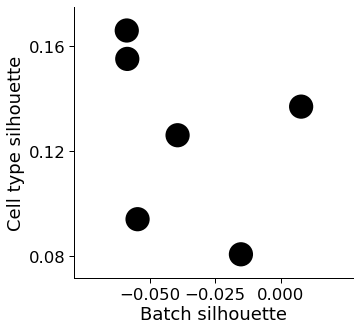

In [107]:
ax = fig, ax = plt.subplots(1,1,figsize=(5,5))

sns.scatterplot(
    data = scores,
    y = False,
    x = True,
    s = 450,
    palette= {True : 'white', False : 'black'},
    edgecolor = 'black',
    linewidth = 3,
    hue = 'is_supervised',
    ax  = ax,
    legend=False
)

ax.set_xmargin(0.3)
ax.set_ymargin(0.3)
ax.axis('equal')
ax.set(ylabel = 'Cell type silhouette', xlabel = 'Batch silhouette',
      xticks = [-0.05, -0.025, -0,], yticks = [0.08, 0.12, 0.16])
sns.despine()
for side in ['left','bottom']:
    ax.spines[side].set_linewidth(1.)

ax.tick_params(width=1, length = 5)
plt.savefig('sup1/ATAC_silhouette_scores.svg')

In [108]:
scores

batch_features,space,False,True,is_supervised
0,X_LSI,0.080836,-0.015241,False
1,X_harmony,0.094188,-0.054558,False
2,X_no_correction_umap_features,0.137010,0.007664,False
3,X_nofrip_umap_features,0.155162,-0.058471,False
4,X_umap_features,0.165967,-0.058666,False
5,peakvi_features,0.126129,-0.039337,False


In [109]:
space_name_map = {
            'X_harmony' : "Harmony",
            'X_no_correction_umap_features' : 'MIRA (no correction)',
            'X_nofrip_umap_features' : 'CODA, no FRIP',
            'X_LSI' : 'LSI (unintegrated)',
            'X_umap_features' : 'CODA (ours)',
            'peakvi_features' : 'PEAKVI',
        }

In [110]:
scores['is_correcting'] = [False,True, False, True, True,True,]
scores['space'] = scores['space'].map(space_name_map)
scores = scores.rename(columns = {
        False : 'cell type silhouette', 
        True : 'batch silhouette',
        'space' : 'method',
    }).set_index('method')\

In [111]:
scores.to_csv('tables/bonemarrow_ATAC_silhoeutte_scores.tsv', sep = '\t')

In [28]:
from scib.metrics import ilisi_graph, clisi_graph, isolated_labels

In [29]:
ilisi_scores = []

for i, space in enumerate(latent_spaces):
    metric = 'euclidean'
    if i < 2:
        metric = 'manhattan'
    
    sc.pp.neighbors(atac_data, use_rep=space, metric= metric)
    
    scores = (space, clisi_graph(atac_data, 'Site', 'cell_type', subsample=20), ilisi_graph(atac_data, 'Site', subsample = 20))
    ilisi_scores.append(scores)
    
    print(*scores, sep = '\t')
    

X_umap_features	0.9910860552561053	0.3816309490623113
X_no_correction_umap_features	0.9929514288038115	0.18713448038449085
X_nofrip_umap_features	0.9912733064469059	0.37751798143896104
peakvi_features	0.9909627367562929	0.45374192156931487
X_harmony	0.9865021065442666	0.634881871933883
X_LSI	0.9906329730776167	0.24620260629427082


In [114]:
ilisi_scores_df = pd.DataFrame(ilisi_scores, columns=['method', 'cell type iLISI', 'batch iLISI'])
ilisi_scores_df['is_correcting'] = [True, False, True,True, True, False]
ilisi_scores_df['is_supervised'] = [False, False, False, False, False, False]

ilisi_scores_df['method'] = ilisi_scores_df.method.map(space_name_map)
ilisi_scores_df.set_index('method').to_csv('tables/bonemarrow_ATAC_iLISI_scores.tsv',sep = '\t')

In [115]:
ilisi_scores_df.sort_values('cell type iLISI')

,method,cell type iLISI,batch iLISI,is_correcting,is_supervised
4,Harmony,0.986502,0.634882,True,False
5,LSI (unintegrated),0.990633,0.246203,False,False
3,PEAKVI,0.990963,0.453742,True,False
0,CODA (ours),0.991086,0.381631,True,False
2,"CODA, no FRIP",0.991273,0.377518,True,False
1,MIRA (no correction),0.992951,0.187134,False,False


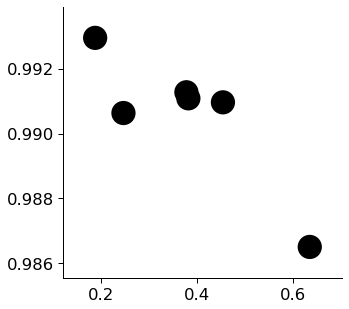

In [116]:
fig, ax = plt.subplots(1,1,figsize=(5,5), sharey=True)

#for ax_ in ax:
sns.scatterplot(
    ax = ax,
    data = ilisi_scores_df,
    y = 'cell type iLISI',
    x = 'batch iLISI',
    s = 450,
    palette= {True : 'white', False : 'black'},
    edgecolor = 'black',
    linewidth = 3,
    hue = 'is_supervised',
    legend=False
)
ax.set_xmargin(0.15)
ax.set_ymargin(0.15)
sns.despine()
ax.set(ylabel = '', xlabel = '')
for side in ['left','bottom']:
    ax.spines[side].set_linewidth(1.)

ax.tick_params(width=1, length = 5)
#ax.axis('equal')
plt.savefig('sup1/bonemarrow_ATAC_ilisi.svg')

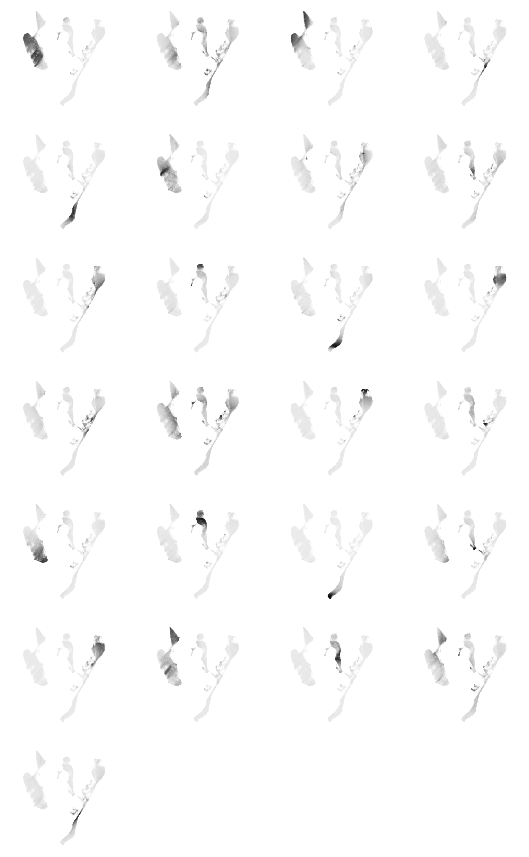

In [118]:
from mira.plots.base import map_plot, plot_umap, map_colors

def topic_umap(ax, topic):
    
    ax = plot_umap(
        atac_data.obsm['MIRA_umap_features_UMAP'],
        atac_data.obs_vector(topic),
        palette=sns.color_palette('light:black', as_cmap=True),
        figsize=(5,5),
        size = 0.1,
        add_legend=False,
        vmin=-0.025,
        ax = ax,
        title = None,#'Topic ' + topic.split('_')[-1],
        edgecolor = None,
        linewidth = 0.
    )
    ax.set_xmargin(0.2)
    ax.set_xmargin(0.2)
    
    ax.axes.invert_xaxis()
    #ax.axes.invert_yaxis()

map_plot(topic_umap, [[x] for x in mira_model.topic_cols], plots_per_row=4, height=1.75, aspect=1.1)
plt.savefig('sup1/ATAC_topics.png', bbox_inches = 'tight', dpi = 300)

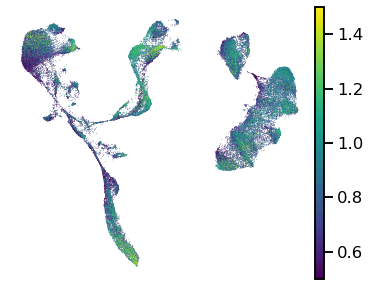

In [127]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sc.pl.embedding(atac_data, basis = 'MIRA_nofrip_umap_features_UMAP',
               frameon=False, cmap='viridis',#sns.color_palette('light:red',as_cmap=True), 
                color = 'ATAC_reads_in_peaks_frac',
               vmin = 0.5, ax = ax, show = False, title = '', 
                vmax = 1.5)

plt.savefig('sup1/FRIP_score.png', dpi = 300, bbox_inches = 'tight')

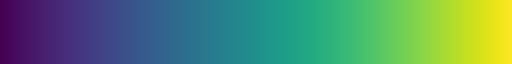

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2aaab48f7440>


In [120]:
sns.color_palette('viridis', as_cmap=True)

In [36]:
atac_data.obs.columns[atac_data.obs.columns.str.startswith('ATAC')]

Index(['ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac',
       'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal',
       'ATAC_pseudotime_order'],
      dtype='object')

In [39]:
qc_cols = ['ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac',
       'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal']

In [102]:
corrs = np.corrcoef(np.log(atac_data.obsm['X_no_correction_topics'].T), 
            atac_data.obs[qc_cols].values.T)

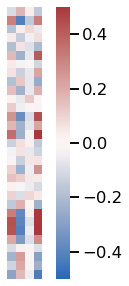

In [104]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

topic_cols = ['topic_' + str(i) for i in range(31)]
ax = sns.heatmap(pd.DataFrame(corrs[:31,31:], columns=qc_cols), ax = ax,
                 square = True,linecolor = 'black', linewidth = 0.003,
                        cmap='vlag',vmin = -0.5, vmax = 0.5)

ax.set(yticks = [], xticks = [])

plt.savefig('sup1/qc_topics_heatmap.svg')